[wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)
> ロジスティック回帰（ロジスティックかいき、英: Logistic regression）は、ベルヌーイ分布に従う変数の統計的回帰モデルの一種である。連結関数としてロジットを使用する一般化線形モデル (GLM) の一種でもある。1958年に David Cox が発表した[1]。確率の回帰であり、統計学の分類に主に使われる。医学や社会科学でもよく使われる。

基本的にはシグモイド関数を線形回帰で求められた仮説($\theta$)へと適用した結果の分類を考えるモデルです。  
シグモイド関数は下記の様な形をしています。  
$$\sigma = \frac{1}{1+e^{-\theta}}$$

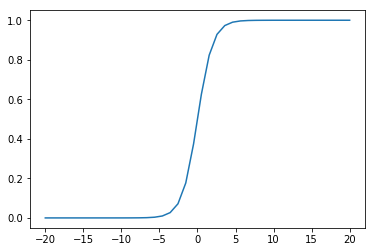

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(a):
    return 1/(1+np.exp(-a))

X = np.linspace(-20, 20, 40)
plt.plot(X, sigmoid(X))
plt.show()

上記の図からもわかる様に、どんな値も0から1の値に押し込める作業をしてくれます。
このレンジで取れるものなので、確率の値と捉えてその値の大小を用いて2値分類の様な分類をしていくこともできます。

In [6]:
"""
Dataset Description: https://archive.ics.uci.edu/ml/datasets/iris
columns:
1. s_l => sepal length in cm
2. s_w => sepal width in cm
3. p_l => petal length in cm
4. p_w => petal width in cm
5. class:
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica
"""

import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['s_l', 's_w', 'p_l', 'p_w'])
Y = pd.DataFrame(iris.target, columns=['class'])

# cross validation
LR = linear_model.LogisticRegression(C=1e5)
print("cross_val_score: ", cross_val_score(LR, X, Y.values.reshape(len(Y)), scoring='accuracy'))

# Merger X,Y into a dataframe
Data = pd.concat([X,Y], axis=1)
print(Data.describe())

# split data into train/test
split_index = int(len(X)*0.66)

# shuffle datasets
Data = Data.sample(frac=1)

# split data into train/test
X_train, X_test = Data.iloc[:split_index, :-2], Data.iloc[split_index:, :-2]
Y_train, Y_test = Data.iloc[:split_index, -1], Data.iloc[split_index:, -1]

LR = linear_model.LogisticRegression(C=1e5)
LR.fit(X_train, Y_train)
prediction = LR.predict(X_test)
matrix = confusion_matrix(prediction, Y_test.values.reshape(len(Y_test)))
print(matrix)

cross_val_score:  [ 0.98039216  0.88235294  1.        ]
              s_l         s_w         p_l         p_w       class
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667    1.000000
std      0.828066    0.433594    1.764420    0.763161    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000
[[21  0  0]
 [ 0 11  1]
 [ 0  2 16]]
